<img src="Images/logo.png" width="40" /> <font size="+20"> **SARABANDE** </font>

# Application Example

In [8]:
pip install sarabande==0.1.4

  Installing build dependencies ... /^C
anceled
ERROR: Operation cancelled by user
Note: you may need to restart the kernel to use updated packages.


In [1]:
#Preamble
# import sarabande
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.axes_grid1 as axgrid
from mpl_toolkits.axes_grid1 import make_axes_locatable
import astropy.io.fits as pyf
import os
import sarabande
plt.style.use("light_mode") #custom matplotlib style sheet

# sarabande.about()

In [2]:
sarabande.calc_zeta??

Signature:
sarabande.calc_zeta(
    measure_obj,
    normalize=True,
    verbose_flag=True,
    skip_prepare=False,
)
Source:   
def calc_zeta(measure_obj, normalize=True, verbose_flag=True, skip_prepare=False):
    """
    This function is where the core algorithms take place for measuring the 3/4 PCFs 
    either projected or not projected. In total there are 4 options

    - projected 3PCF        - projected 4PCF
    - full 3PCF             - full 4PCF
    
    Args:
        measure_obj (class: measure): an object that carries the necessary values and data structures to compute 3/4 PCFs
        normalize (bool, optional): flag to determine whether we would like to normalize by the bin volume(s). Defaults to True.
        verbose_flag (bool, optional): flag to walk the user through the full calculation process. Defaults to True.
        skip_prepare (bool, optional): Flag to determine whether or not we should skip preparing the data (if you already ran the calculation). Defaults to F

In order to use SARABANDE on any data, we need to import our data. For this we will pull data from [CATS](https://www.mhdturbulence.com), an open source catalog of Magnetohydrodynamic (MHD) Turbulence simulations. This is currently stored in the `data` folder. We also subtract out the mean from the data set just so we can examine the fluctuations of the density field.

In [29]:
hdulist = pyf.open('../data/dens_t800.fits.gz')
data = hdulist[0].data.astype(np.float64)
# data = data[:128,:128,:128] # for sake of fast computation
data -= np.mean(data)

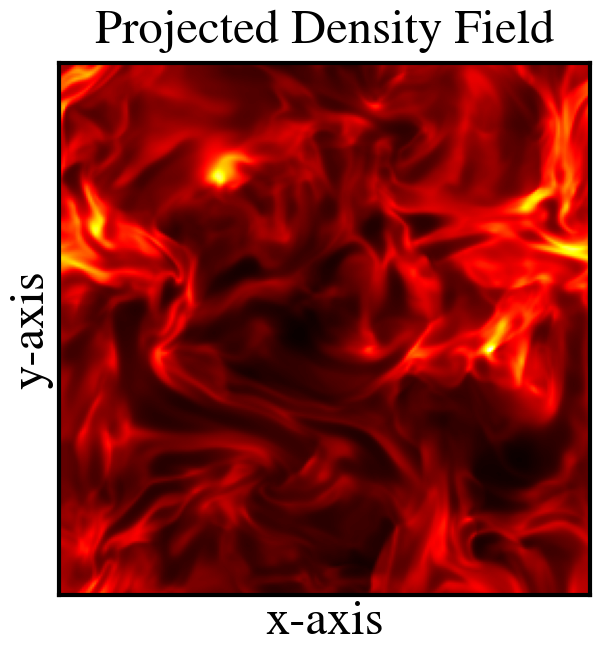

In [40]:
fig, (ax1) = plt.subplots(1,1, figsize=(7,7))
im1 = ax1.imshow(data[:,:,64], cmap='hot', origin='lower')
# divider1 = axgrid.make_axes_locatable(ax1)
# cax1 = divider1.append_axes("right", size='5%', pad=0.05)
# plt.colorbar(im1, cax=cax1)
ax1.set_title("Projected Density Field", fontsize=35, pad=15)
ax1.set_xlabel("x-axis", fontsize=35)
ax1.set_ylabel("y-axis", fontsize=35)
ax1.set_xticks([])
ax1.set_yticks([])
fig.tight_layout()
# plt.savefig("projected-example.png", dpi=300)
plt.show()

From here we can apply SARABANDE to the density field.

### Full 3PCF

In [36]:
#string to directory to save data into
save_dir = os.getcwd() + '/output/'

#create measure_obj
_3PCF = sarabande.measure(nPCF=3, projected=False, density_field_data = data,
                          save_dir=save_dir, save_name='example', nbins=10, ell_max=2,
                          physical_boxsize=256, rmin=1e-4, rmax=128)

sarabande.calc_zeta(_3PCF, normalize=True)

Preparing the data:
Creating XYZ Grids for radial bin and ylm creation ... 

Creating radial bins ... 

taking the fourier transform of data ... 

calculating YLM Coefficients ... 

binning spherical harmonics ... 

ell, m =  0 0
bin i =  0
bin i =  1
bin i =  2
bin i =  3
bin i =  4
bin i =  5
bin i =  6
bin i =  7
bin i =  8
bin i =  9
ell, m =  1 0
bin i =  0
bin i =  1
bin i =  2
bin i =  3
bin i =  4
bin i =  5
bin i =  6
bin i =  7
bin i =  8
bin i =  9
ell, m =  1 1
bin i =  0
bin i =  1
bin i =  2
bin i =  3
bin i =  4
bin i =  5
bin i =  6
bin i =  7
bin i =  8
bin i =  9
ell, m =  2 0
bin i =  0
bin i =  1
bin i =  2
bin i =  3
bin i =  4
bin i =  5
bin i =  6
bin i =  7
bin i =  8
bin i =  9
ell, m =  2 1
bin i =  0
bin i =  1
bin i =  2
bin i =  3
bin i =  4
bin i =  5
bin i =  6
bin i =  7
bin i =  8
bin i =  9
ell, m =  2 2
bin i =  0
bin i =  1
bin i =  2
bin i =  3
bin i =  4
bin i =  5
bin i =  6
bin i =  7
bin i =  8
bin i =  9
calculating a_lm coefficients ... 

l, m

Now we can plot the results:

In [48]:
np.shape(_3PCF.zeta.real)

np.save("3PCF_256_MHD_10B_l2.npy",_3PCF.zeta.real)

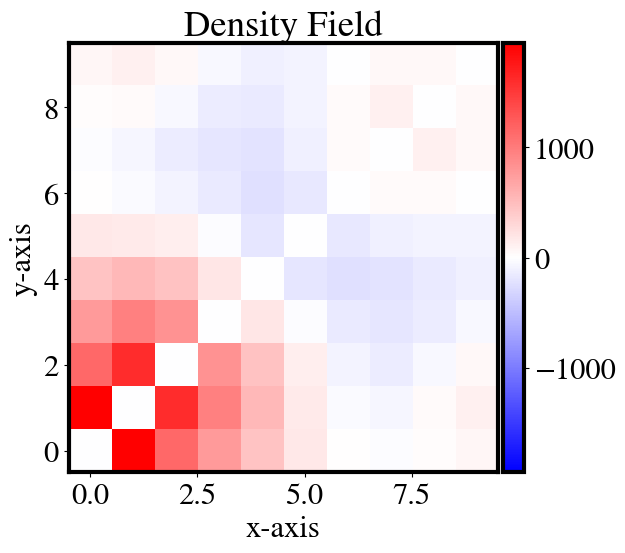

In [47]:
img = _3PCF.zeta[2,:,:].real

fig, (ax1) = plt.subplots(1,1, figsize=(8,6))
im1 = ax1.imshow(img, origin='lower', vmax = np.max(np.abs(img)), vmin = -np.max(np.abs(img)),
                cmap="bwr")
divider1 = axgrid.make_axes_locatable(ax1)
cax1 = divider1.append_axes("right", size='5%', pad=0.05)
plt.colorbar(im1, cax=cax1)
ax1.set_title("Density Field")
ax1.set_xlabel("x-axis")
ax1.set_ylabel("y-axis")
fig.tight_layout()
plt.show()

### Full 4PCF

we can also calculate the full 4PCF

In [49]:
#string to directory to save data into
save_dir = os.getcwd() + '/output/'

#create measure_obj
_4PCF = sarabande.measure(nPCF=4, projected=False,
                          density_field_data = data, save_dir=save_dir,
                          save_name='example', nbins=10, ell_max=2,
                          physical_boxsize=256, rmin=1e-4, rmax=128)

sarabande.calc_zeta(_4PCF, normalize=True)

Preparing the data:
Creating XYZ Grids for radial bin and ylm creation ... 

Creating radial bins ... 

taking the fourier transform of data ... 

calculating YLM Coefficients ... 

binning spherical harmonics ... 

ell, m =  0 0
bin i =  0
bin i =  1
bin i =  2
bin i =  3
bin i =  4
bin i =  5
bin i =  6
bin i =  7
bin i =  8
bin i =  9
ell, m =  1 0
bin i =  0
bin i =  1
bin i =  2
bin i =  3
bin i =  4
bin i =  5
bin i =  6
bin i =  7
bin i =  8
bin i =  9
ell, m =  1 1
bin i =  0
bin i =  1
bin i =  2
bin i =  3
bin i =  4
bin i =  5
bin i =  6
bin i =  7
bin i =  8
bin i =  9
ell, m =  2 0
bin i =  0
bin i =  1
bin i =  2
bin i =  3
bin i =  4
bin i =  5
bin i =  6
bin i =  7
bin i =  8
bin i =  9
ell, m =  2 1
bin i =  0
bin i =  1
bin i =  2
bin i =  3
bin i =  4
bin i =  5
bin i =  6
bin i =  7
bin i =  8
bin i =  9
ell, m =  2 2
bin i =  0
bin i =  1
bin i =  2
bin i =  3
bin i =  4
bin i =  5
bin i =  6
bin i =  7
bin i =  8
bin i =  9
calculating a_lm coefficients ... 

l, m

In [51]:
np.shape(_4PCF.zeta.real)

np.save("4PCF_256_MHD_10B_l2.npy",_4PCF.zeta.real)

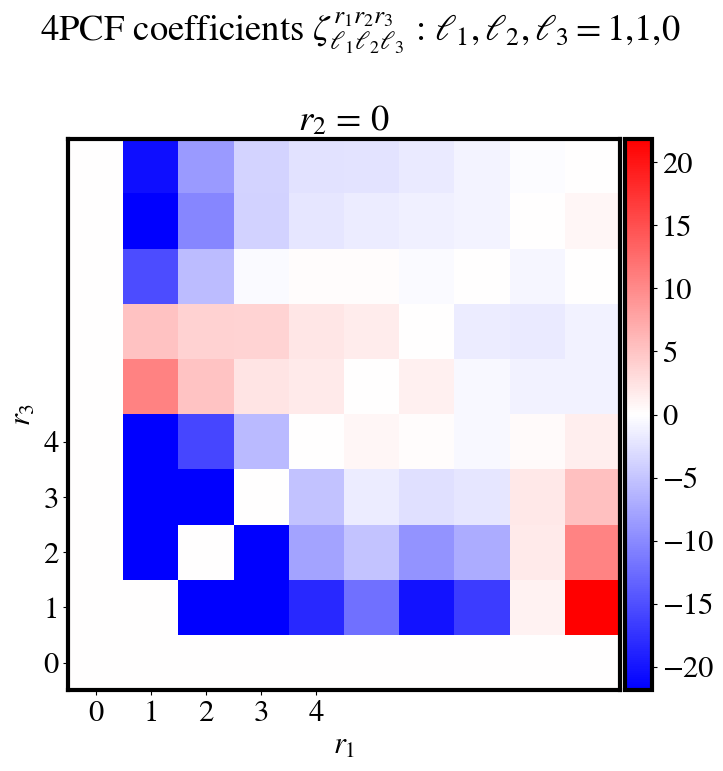

In [52]:
ells = '110'
b_1 = 0
b_2 = 0
b_3 = 0

zeta = _4PCF.zeta[int(ells[0]),int(ells[1]),int(ells[2])]
f, ax1 = plt.subplots(1,1, figsize=(10,8))

ells_string = '$\\ell_1, \ell_2, \ell_3 = $' + ells[0] + ',' + ells[1] + ',' + ells[2]
f.suptitle('4PCF coefficients $\\zeta^{r_1 r_2 r_3}_{\ell_1 \ell_2 \ell_3}$ : ' + ells_string)


im1 = ax1.imshow(zeta[:,b_2,:].real, origin='lower', cmap='bwr')
ax1.set_title('$r_2$ = ' + str(b_2))
ax1.set_xticks(range(5))
ax1.set_yticks(range(5))
ax1.set_xlabel("$r_1$")
ax1.set_ylabel("$r_3$")
divider1 = axgrid.make_axes_locatable(ax1)
cax1 = divider1.append_axes("right", size='5%', pad=0.05)
plt.colorbar(im1, cax=cax1)
max_1, min_1 = np.max(zeta[:,b_2,:].real), np.min(zeta[:,b_2,:].real)
im1.set_clim(-max_1, max_1)
f.tight_layout()

## Projected

### Projected 3PCF

In [5]:
#string to directory to save data into
save_dir = os.getcwd() + '/output/'

#create measure_obj
projected_3PCF = sarabande.measure(nPCF=3, projected=True, m_max=5, density_field_data = data[:,:,64], save_dir=save_dir, save_name='example', nbins=20)

sarabande.calc_zeta(projected_3PCF)

Preparing the data:
Creating Radial Bins ... 

Creating kernels ... 

taking the fourier transform of data ... 

calculating C_m Coefficients ... 

Starting Calculation of Projected 3PCF.

Finished Calculating the Projected 3PCF in 2.3193 seconds


In [6]:
np.shape(projected_3PCF.zeta)

(6, 20, 20)

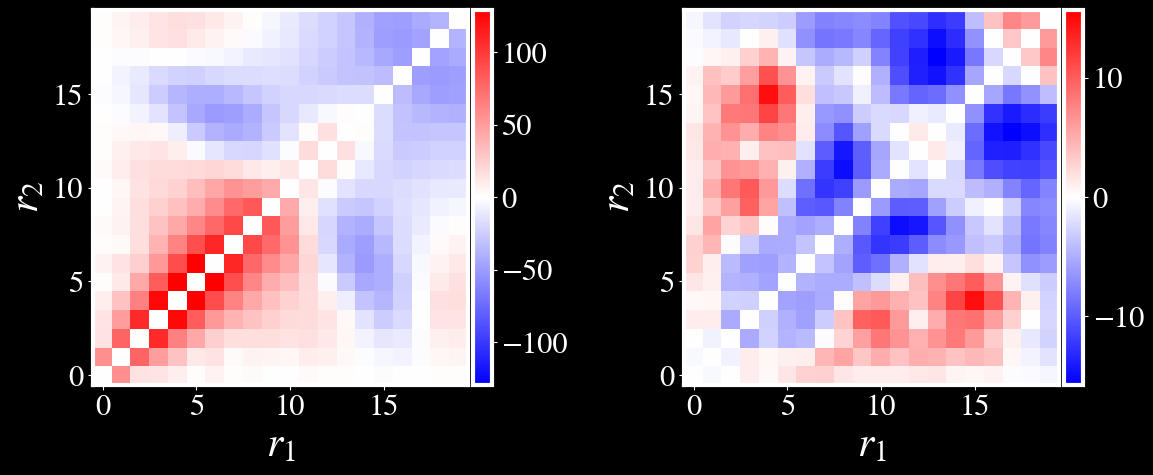

In [19]:
m = 3

fig, (ax1,ax2) = plt.subplots(1,2, figsize=(12,6))
# fig.suptitle("Projected 3PCF $$\\zeta_m(\mathrm{b}_1,\mathrm{b}_1)  $$ with $m$ = {}".format(m), fontsize=35)
im1 = ax1.imshow(projected_3PCF.zeta[m, :,:].real, origin='lower', cmap='bwr',vmin= -np.max(np.abs(projected_3PCF.zeta[m,:,:].real)),vmax= np.max(np.abs(projected_3PCF.zeta[m,:,:].real)))
divider1 = axgrid.make_axes_locatable(ax1)
cax1 = divider1.append_axes("right", size='5%', pad=0.05)
plt.colorbar(im1, cax=cax1)
# ax1.set_title("Real Part")
ax1.set_xlabel("$r_1$", fontsize=30)
ax1.set_ylabel("$r_2$", fontsize=30)

im2 = ax2.imshow(projected_3PCF.zeta[m,:,:].imag, origin='lower', cmap='bwr',vmin= -np.max(np.abs(projected_3PCF.zeta[m,:,:].imag)),vmax= np.max(np.abs(projected_3PCF.zeta[m,:,:].imag)))
divider2 = axgrid.make_axes_locatable(ax2)
cax2 = divider2.append_axes("right", size='5%', pad=0.05)
plt.colorbar(im2, cax=cax2)
# ax2.set_title("Imaginary Part")
ax2.set_xlabel("$r_1$", fontsize=30)
ax2.set_ylabel("$r_2$", fontsize=30)

fig.tight_layout()
plt.show()

### Projected 4PCF

In [9]:
#string to directory to save data into
save_dir = os.getcwd() + '/output/'

#create measure_obj
projected_4PCF = sarabande.measure(nPCF=4, projected=True, m_max=5, density_field_data = data[:,:,64], save_dir=save_dir, save_name='example', nbins=10)

sarabande.calc_zeta(projected_4PCF)

Preparing the data:
Creating Radial Bins ... 

Creating kernels ... 

taking the fourier transform of data ... 

calculating C_m Coefficients ... 

Starting Calculation of Projected 4PCF.


UnboundLocalError: local variable 'nbins' referenced before assignment

In [8]:
np.shape(projected_4PCF.zeta)

(20, 20, 20, 10, 10)

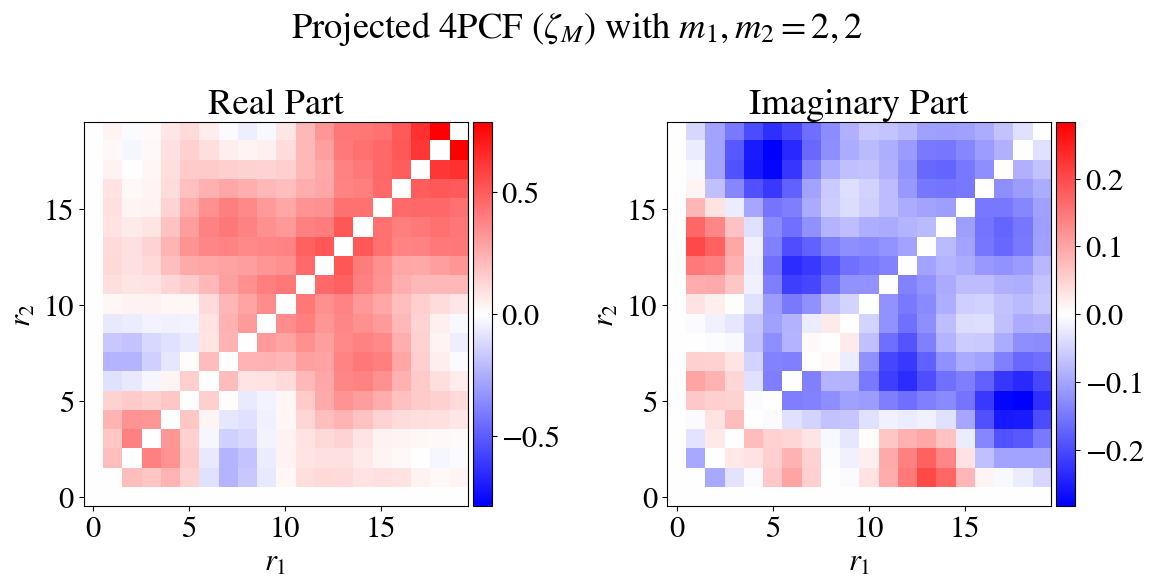

In [18]:
m1 = 2
m2 = 2
b1 = 0
b2 = 0
b3 = 0

fig, (ax1,ax2) = plt.subplots(1,2, figsize=(12,6))
fig.suptitle("Projected 4PCF ($\\zeta_M$) with $m_1 ,m_2 = {0}, {1}$".format(m1,m2))
im1 = ax1.imshow(projected_4PCF.zeta[:,:,b3,m1, m2].real, origin='lower', cmap='bwr',vmin= -np.max(np.abs(projected_4PCF.zeta[:,:,b3,m1, m2].real)),vmax= np.max(np.abs(projected_4PCF.zeta[:,:,b3,m1, m2].real)))
divider1 = axgrid.make_axes_locatable(ax1)
cax1 = divider1.append_axes("right", size='5%', pad=0.05)
plt.colorbar(im1, cax=cax1)
ax1.set_title("Real Part")
ax1.set_xlabel("$r_1$")
ax1.set_ylabel("$r_2$")

im2 = ax2.imshow(projected_4PCF.zeta[:,:,b3,m1, m2].imag, origin='lower', cmap='bwr',vmin= -np.max(np.abs(projected_4PCF.zeta[:,:,b3,m1, m2].imag)),vmax= np.max(np.abs(projected_4PCF.zeta[:,:,b3,m1, m2].imag)))
divider2 = axgrid.make_axes_locatable(ax2)
cax2 = divider2.append_axes("right", size='5%', pad=0.05)
plt.colorbar(im2, cax=cax2)
ax2.set_title("Imaginary Part")
ax2.set_xlabel("$r_1$")
ax2.set_ylabel("$r_2$")

fig.tight_layout()
plt.show()

In [4]:
os.cpu_count()

8

In [6]:
import multiprocessing

multiprocessing.cpu_count()

8